In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, Y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)
print('X_train shape ', X_train.shape)
print('X_test shape ', X_test.shape)

X_train shape  (7500, 2)
X_test shape  (2500, 2)


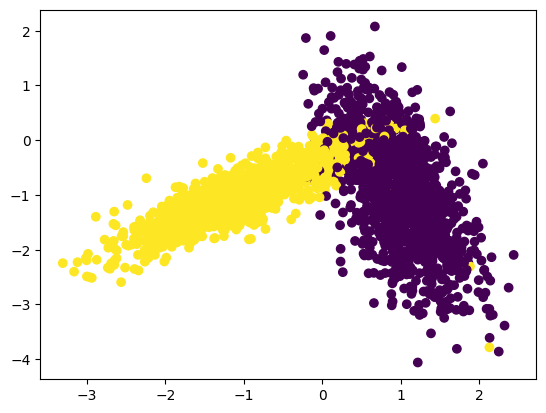

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [3]:
from sklearn.metrics import accuracy_score
def get_random_60_percent_indices(x_train_arr):
    return random.sample(range(0, len(x_train_arr)), int(0.6*len(x_train_arr)))
def GridSearch_knn(X_train, Y_train, knn_clf, params, folds):
    train_accuracy_scores_arr_from_mean =  []
    cv_accuracy_scores_arr_from_mean = []
    for k in tqdm(params['n_neighbors']):
      train_accuracy_score_folds = []
      cv_accuracy_score_folds = []
      for fold in range(folds):
        train_indices_selected_for_current_fold = get_random_60_percent_indices(X_train)
        cv_indices_selected_for_current_fold = list(set(list(range(1, len(X_train)))) - set(train_indices_selected_for_current_fold))
        X_train_current_fold = X_train[train_indices_selected_for_current_fold]
        Y_train_current_fold = Y_train[train_indices_selected_for_current_fold]
        X_CV_current_fold = X_train[cv_indices_selected_for_current_fold]
        Y_CV_current_fold = Y_train[cv_indices_selected_for_current_fold]
        knn_clf.n_neighbors = k
        knn_clf.fit(X_train_current_fold, Y_train_current_fold)
        Y_predicted_cv = knn_clf.predict(X_CV_current_fold)  
        cv_accuracy_score_folds.append(accuracy_score(Y_CV_current_fold, Y_predicted_cv))
        Y_predicted_train = knn_clf.predict(X_train_current_fold)
        train_accuracy_score_folds.append(accuracy_score(Y_train_current_fold, Y_predicted_train))
      train_accuracy_scores_arr_from_mean.append(np.mean(np.array(train_accuracy_score_folds)))
      cv_accuracy_scores_arr_from_mean.append(np.mean(np.array(cv_accuracy_score_folds)))
    return train_accuracy_scores_arr_from_mean, cv_accuracy_scores_arr_from_mean

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 5
train_scores_accuracy,cv_scores_accuracy = GridSearch_knn(X_train, Y_train, neigh, params, folds)

100%|██████████| 11/11 [00:15<00:00,  1.45s/it]


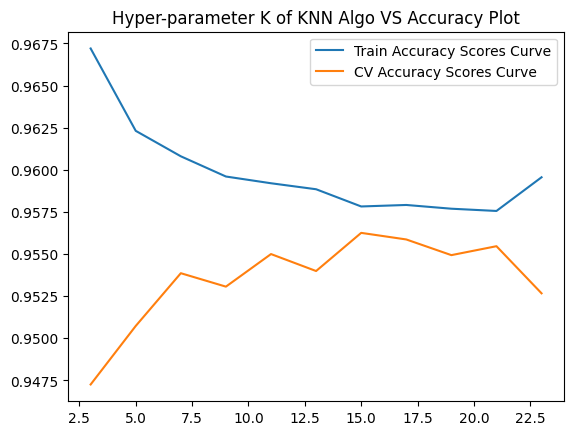

In [5]:
plt.plot(params['n_neighbors'],train_scores_accuracy, label='Train Accuracy Scores Curve')
plt.plot(params['n_neighbors'],cv_scores_accuracy, label='CV Accuracy Scores Curve')
plt.title('Hyper-parameter K of KNN Algo VS Accuracy Plot')
plt.legend()
plt.show()